# ICT Data Analysis

In [1]:
import pandas as pd
file =  pd.read_csv("PlayerGW API/player_gw_clean_all.csv")


From the original CSV file, we only needed to analyze the data:
- Goals
- Assists
- Clean Sheets
- Minutes played
- Infuence
- Creativity
- Threat
- Overall ICT (Calculated by Fantasy)

The first thing we needed to do was to go ahead a manipulate the data frame to only gather the attributes we need (Decided to keep the game weeks column in just in case we use it for later on in the EDA):

In [2]:
ict = file[["id", "stats.goals_scored", "stats.assists", "stats.clean_sheets", "stats.influence",
            "stats.creativity", "stats.threat", "stats.ict_index", "stats.minutes", "gw"]]

ict = ict.rename(columns={"stats.goals_scored":"goals", "stats.assists":"assists", "stats.clean_sheets":"cleansheets",
            "stats.influence":"influence", "stats.creativity":"creativity", "stats.threat":"threat",
            "stats.ict_index":"ict", "stats.minutes":"minutes"})
ict


,id,goals,assists,cleansheets,influence,creativity,threat,ict,minutes,gw
0,14,0,0,1,18.0,0.0,0.0,1.8,90,1
1,27,0,0,0,0.0,0.0,0.0,0.0,0,1
2,47,0,0,1,25.4,0.0,0.0,2.5,90,1
3,48,0,0,0,0.0,0.0,0.0,0.0,0,1
4,72,0,0,0,0.0,0.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...
15295,592,0,0,0,0.0,0.0,0.0,0.0,0,27
15296,613,0,0,0,3.2,1.9,20.0,2.5,90,27
15297,622,0,0,0,0.0,0.0,0.0,0.0,0,27
15298,623,0,0,0,0.2,1.4,2.0,0.4,9,27


The first thing we wanted to analyze from the attributes, was mainly the player that had the most influnce in the game, in this case the players that participated in the match for 25 min or more.

In [3]:
ict_1 = ict.loc[ict['minutes'] > 25]
ict_1

,id,goals,assists,cleansheets,influence,creativity,threat,ict,minutes,gw
0,14,0,0,1,18.0,0.0,0.0,1.8,90,1
2,47,0,0,1,25.4,0.0,0.0,2.5,90,1
7,93,0,0,1,25.6,10.0,0.0,3.6,90,1
8,94,0,0,0,24.2,0.0,0.0,2.4,90,1
10,111,0,0,0,7.0,0.0,0.0,0.7,90,1
...,...,...,...,...,...,...,...,...,...,...
15274,466,0,0,0,11.4,14.7,13.0,3.9,90,27
15275,468,0,1,1,19.2,0.9,103.0,12.3,90,27
15278,501,0,0,0,14.6,4.5,104.0,12.3,90,27
15279,502,1,0,0,32.0,2.7,47.0,8.2,90,27


## EDA
Since there was not much manipulating to do we decided to move on to the next step.
The first thing we decided to look at was the relationships between the offensive attributes of each player like the influence, creativity and threat. All of which was provided by the FPL, and the relationship that these attributes have on the offisice plays each week.

In [4]:
import random as rand
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

The first step can simply just be a graphing the relationship between each graph, but as seen below, we wont be gathering much of a visualitation due to a player only scoring 1 and 2 goals per week. To really understand the relationship, I belive we would have to see the averages of each player.

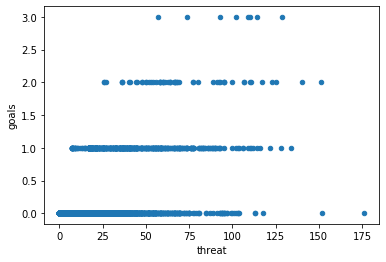

In [13]:
ict_1.plot.scatter(x="threat", y = "goals")

In [14]:
ict_avg = ict_1.groupby("id").mean()


### Goals

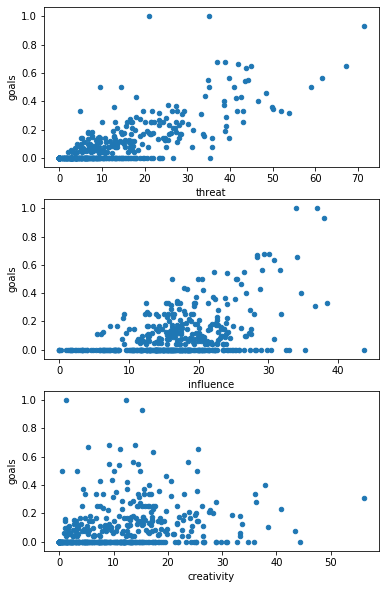

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols= 1,figsize= (6, 10))

ict_avg.plot(x = "threat", y = "goals", ax = ax1, kind = "scatter")
ict_avg.plot(x = "influence", y = "goals", ax = ax2, kind = "scatter")
ict_avg.plot(x = "creativity", y = "goals", ax = ax3, kind = "scatter")

As seen for this first section, we can cleary see that each all three of these player attributes can have an impact on the players preformance in each game, although there are other factors that can effect preformace like the other teams strengths and weakneses, (which we will look at). It seems that threat and influence can determine best how many goals will or can be scored by the player on average of course.

### Assists

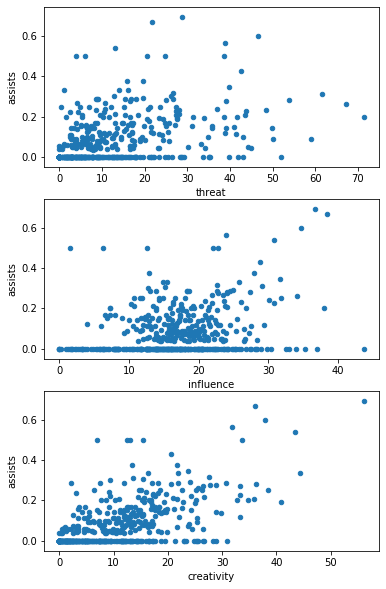

In [19]:
fig, (ax11, ax12, ax13) = plt.subplots(nrows = 3, ncols= 1,figsize= (6, 10))

ict_avg.plot(x = "threat", y = "assists", ax = ax11, kind = "scatter")
ict_avg.plot(x = "influence", y = "assists", ax = ax12, kind = "scatter")
ict_avg.plot(x = "creativity", y = "assists", ax = ax13, kind = "scatter")

As for assists, we noticed that the relationship between these attributes and the amount of assists of each player was more closely fitted with Creativity, the others were more clustered in a specific spot.

### Clean Sheets

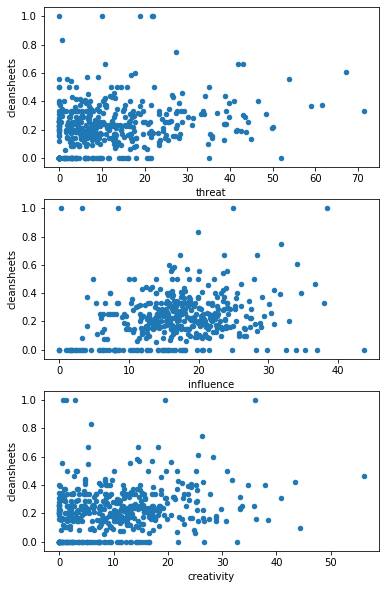

In [18]:
fig, (ax11, ax12, ax13) = plt.subplots(nrows = 3, ncols= 1,figsize= (6, 10))

ict_avg.plot(x = "threat", y = "cleansheets", ax = ax11, kind = "scatter")
ict_avg.plot(x = "influence", y = "cleansheets", ax = ax12, kind = "scatter")
ict_avg.plot(x = "creativity", y = "cleansheets", ax = ax13, kind = "scatter")

Lastly, we noticed the best graph to represent any sort of relationship with the amount of Clean Sheets each player had with their respective teams was mostly effected by the amount of Influence each player had.


### ICT INDEX

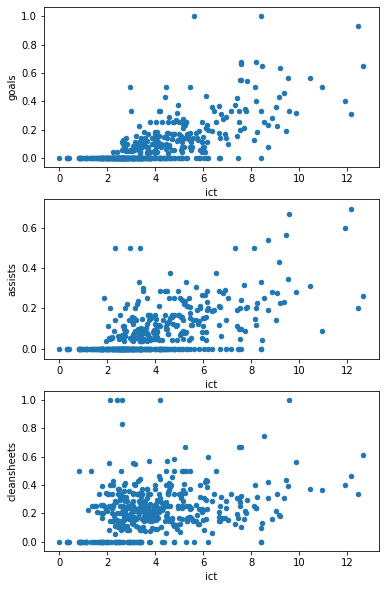

In [20]:
fig, (ax11, ax12, ax13) = plt.subplots(nrows = 3, ncols= 1,figsize= (6, 10))

ict_avg.plot(x = "ict", y = "goals", ax = ax11, kind = "scatter")
ict_avg.plot(x = "ict", y = "assists", ax = ax12, kind = "scatter")
ict_avg.plot(x = "ict", y = "cleansheets", ax = ax13, kind = "scatter")

For this last portion, I wanted to examine the realtionship between each category and their own ICT value calculated by the Fantasy Premier League.

To really determine this analysis, we will be using these graphs to create ML model later on.

In [21]:
ict.to_csv("ICT/ict_players.csv", index=False)